Column 'mass (g)' not found in the dataset. Please adjust the column name.


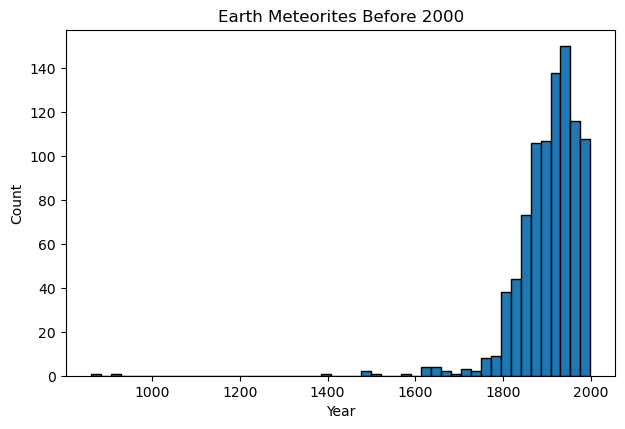

In [4]:
#question 7
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import ssl

# Disable SSL verification
ssl._create_default_https_context = ssl._create_unverified_context

# Load the JSON data from the provided link
url = 'https://data.nasa.gov/resource/y77d-th95.json'
data = pd.read_json(url)

# Get all the Earth meteorites that fell before the year 2000
earth_meteorites_before_2000 = data[data['reclat'].notnull() & (data['year'].astype(str).str[:4] < '2000')]

# Check if 'mass (g)' column exists in the dataset
if 'mass (g)' in earth_meteorites_before_2000.columns:
    # Assuming mass is in grams, convert it to kilograms
    earth_meteorites_before_2000['mass_kg'] = earth_meteorites_before_2000['mass (g)'] / 1000
    # Get all meteorites with mass greater than 10000 kg
    earth_meteorites_mass_gt_10000kg = earth_meteorites_before_2000[earth_meteorites_before_2000['mass_kg'] > 10000]
else:
    print("Column 'mass (g)' not found in the dataset. Please adjust the column name.")

# Plotting the data
plt.figure(figsize=(12, 8))

# Plotting Earth meteorites before 2000
plt.subplot(2, 2, 1)
plt.hist(earth_meteorites_before_2000['year'].astype(str).str[:4].astype(int), bins=50, edgecolor='black')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Earth Meteorites Before 2000')

# Plotting Earth meteorites with mass > 10000 kg (if available)
if 'mass (g)' in earth_meteorites_before_2000.columns:
    plt.subplot(2, 2, 3)
    plt.boxplot(earth_meteorites_mass_gt_10000kg['mass_kg'])
    plt.ylabel('Mass (kg)')
    plt.title('Earth Meteorites with Mass > 10000 kg')

# Show the plots
plt.tight_layout()
plt.show()
